In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
banks = pd.read_csv("./banks-1.csv")
banks.head(10)


,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69
5,6,1,9.1,0.13,0.74
6,7,1,11.9,0.10,0.79
7,8,1,8.1,0.13,0.63
8,9,1,9.3,0.16,0.72
9,10,1,1.1,0.16,0.57


In [2]:
# Normalization of features
features_list = ["TotLns&Lses/Assets", "TotExp/Assets"]
for feature in features_list:
    mean = banks[feature].mean()
    std = banks[feature].std()
    banks[feature] = (banks[feature] - mean) / std

banks.head(10)

,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.594974,0.134561
1,2,1,1.0,0.211120,-0.053199
2,3,1,6.9,-0.556588,2.450265
3,4,1,5.8,-0.172734,0.259734
4,5,1,4.3,0.211120,0.384908
5,6,1,9.1,0.978828,0.697841
6,7,1,11.9,-0.172734,1.010773
7,8,1,8.1,0.978828,0.009388
8,9,1,9.3,2.130390,0.572667
9,10,1,1.1,2.130390,-0.366132


In [3]:
def sigmoid_func(z):
    return 1/(1+np.exp(-z))



In [4]:
def z_value(weights_list, f_val_list):
    return sum([w*f for w, f in zip(weights_list[1:], f_val_list)]) + weights_list[0]



In [5]:
def cost_func(banks, weights_list, features_list, label, lambda_reg=0.01):
    c = 0
    m = len(banks)
    for i in range(m):
        f_val_list = list(banks.loc[i, features_list])
        val = z_value(weights_list, f_val_list)
        pred = sigmoid_func(val)
        label_iter = banks.loc[i, label]
        c += (label_iter * np.log(pred) + ((1 - label_iter) * np.log(1 - pred)))
    reg = (lambda_reg / (2 * m)) * sum([w**2 for w in weights_list[1:]])
    return (-c / m) + reg

a=cost_func(banks, [0,0,0], ["TotLns&Lses/Assets", "TotExp/Assets"] , "Financial Condition")
a

0.6931471805599453

In [6]:
def gradient_descent(banks, weights_list, features_list, label, lambda_reg=0.01):
    gradient = [0 for _ in weights_list]
    m = len(banks)
    for i in range(m):
        f_val_list = list(banks.loc[i, features_list])
        val = z_value(weights_list, f_val_list)
        pred = sigmoid_func(val)
        diff = pred - banks.loc[i, label]
        gradient[0] += diff
        for j in range(1, len(weights_list)):
            gradient[j] += diff * f_val_list[j-1] + (lambda_reg / m) * weights_list[j]
    return [g / m for g in gradient]

w=gradient_descent(banks, [0,0,0],["TotLns&Lses/Assets", "TotExp/Assets"], "Financial Condition")
w

[0.0, -0.25504036467542884, -0.31667959130920365]

In [7]:
def update_weight(alpha, weights_list, gradient):
    return [w - alpha*g for w, g in zip(weights_list, gradient)]


In [8]:
def plot_cost_over_time(cost_list):
    plt.plot(cost_list)
    plt.title('Cost over Time')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()



In [9]:
def main_iterate(banks, features_list, label, alpha, threshold=0.001, lambda_reg=0.01):
    weight_initial = [0 for _ in features_list] + [0]
    cost_list = []
    cost = cost_func(banks, weight_initial, features_list, label, lambda_reg)
    cost_list.append(cost)
    while True:
        gradient = gradient_descent(banks, weight_initial, features_list, label, lambda_reg)
        weight_initial = update_weight(alpha, weight_initial, gradient)
        new_cost = cost_func(banks, weight_initial, features_list, label, lambda_reg)
        cost_list.append(new_cost)
        if abs(new_cost - cost) <= threshold:
            break
        cost = new_cost
    return weight_initial, cost_list

m = main_iterate(banks, ["TotExp/Assets", "TotLns&Lses/Assets"], "Financial Condition", 0.01)

weights_list=m[0]
cost_list=m[1]
print(cost_list)

[0.6931471805599453, 0.69149632569863, 0.6898552840554242, 0.6882239969673535, 0.6866024059514764, 0.6849904527084226, 0.6833880791258364, 0.6817952272817301, 0.6802118394477469, 0.6786378580923376, 0.6770732258838457, 0.6755178856935068, 0.6739717805983623, 0.6724348538840855, 0.6709070490477255, 0.6693883098003655, 0.6678785800696987, 0.6663778040025234, 0.6648859259671558, 0.6634028905557647, 0.6619286425866241, 0.6604631271062916, 0.6590062893917076, 0.6575580749522186, 0.6561184295315267, 0.6546872991095635, 0.6532646299042925, 0.6518503683734389, 0.6504444612161489, 0.6490468553745784, 0.6476574980354137, 0.6462763366313234, 0.6449033188423451, 0.6435383925972048, 0.6421815060745723, 0.6408326077042525, 0.6394916461683151, 0.6381585704021608, 0.6368333295955291, 0.6355158731934454, 0.6342061508971091, 0.6329041126647247, 0.6316097087122764, 0.6303228895142484, 0.6290436058042873, 0.6277718085758153, 0.6265074490825872, 0.6252504788391985, 0.624000849621542, 0.6227585134672144, 0.

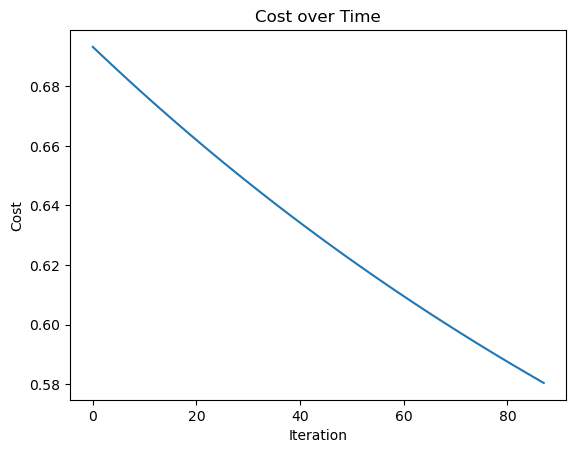

In [10]:
plot_cost_over_time(cost_list)

In [11]:
def split_data(data):
    data = data.sample(frac=1).reset_index(drop=True)
    total_len = len(data)
    train_len = int(0.7 * total_len)
    test_len = int(0.2 * total_len)
    train = data.iloc[:train_len].reset_index(drop=True)
    test = data.iloc[train_len:train_len + test_len].reset_index(drop=True)
    val = data.iloc[train_len + test_len:].reset_index(drop=True)
    return train, test, val



In [12]:
def predict(data, weights, features):
    predictions = []
    for i in range(len(data)):
        f_val_list = list(data.loc[i, features])
        val = z_value(weights, f_val_list)
        pred = sigmoid_func(val)
        predictions.append(1 if pred > 0.5 else 0)
    return predictions



In [13]:
def evaluate_metrics(true_labels, predicted_labels):
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(true_labels, predicted_labels)
    if matrix.shape == (1, 1):
        if true_labels[0] == 0:
            tn = matrix[0][0]
            fp, fn, tp = 0, 0, 0
        else:
            tp = matrix[0][0]
            tn, fp, fn = 0, 0, 0
    else:
        tn, fp, fn, tp = matrix.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1



In [14]:
def tune_hyperparameters(train_data, val_data, features, label):
    best_accuracy = 0
    best_alpha = 0
    best_threshold = 0
    best_lambda = 0
    for alpha in [0.001, 0.01, 0.1]:
        for threshold in [0.0001, 0.001, 0.01]:
            for lambda_reg in [0.001, 0.01, 0.1]:
                weights, _ = main_iterate(train_data, features, label, alpha, threshold, lambda_reg)
                predictions = predict(val_data, weights, features)
                accuracy, _, _, _ = evaluate_metrics(val_data[label], predictions)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_alpha = alpha
                    best_threshold = threshold
                    best_lambda = lambda_reg
    return best_alpha, best_threshold, best_lambda

train, test, val = split_data(banks)
best_alpha, best_threshold, best_lambda = tune_hyperparameters(train, val, features_list, "Financial Condition")
print(f"Best Learning Rate: {best_alpha}")
print(f"Best Threshold: {best_threshold}")

final_weights, _ = main_iterate(train, features_list, "Financial Condition", best_alpha, best_threshold, best_lambda)
test_predictions = predict(test, final_weights, features_list)
accuracy, precision, recall, f1 = evaluate_metrics(test["Financial Condition"], test_predictions)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Best Learning Rate: 0.001
Best Threshold: 0.0001
Accuracy: 0.75
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
